True

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()
os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING_V2"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langchain-academy"

In [30]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode,tools_condition
from langgraph.graph import MessagesState,StateGraph,START,END
from IPython.display import Image,display
from langchain_core.messages import HumanMessage

search_tool = TavilySearchResults(description = "Use this tool for answering current events, news or factual questions.")

tools = [search_tool]
llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)
tool_node = ToolNode(tools)


In [31]:
def tool_calling_llm(state: MessagesState):
    return{
        "messages":[llm_with_tools.invoke(state["messages"])]
    }

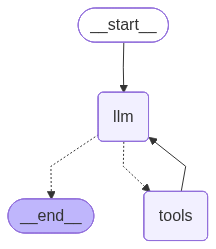

In [32]:
builder = StateGraph(MessagesState)
builder.add_node("llm",tool_calling_llm)
builder.add_node("tools",tool_node)
builder.add_edge(START,"llm")
builder.add_conditional_edges("llm",tools_condition)
builder.add_edge("tools","llm")
graph = builder.compile()
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [33]:
result = graph.invoke({
        "messages":[HumanMessage(content="Latest AI news")]
})

In [34]:
for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

Latest AI news
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_mRVsIIo4eLpMXvAss12XtU02)
 Call ID: call_mRVsIIo4eLpMXvAss12XtU02
  Args:
    query: latest AI news
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "AI News | Latest News | Insights Powering AI-Driven Business Growth", "url": "https://www.artificialintelligence-news.com/", "content": "AI News is part of the TechForge Publications series\n\nTechForge\n\nMagnifying glass and digital brain as separating logic from inference improves AI agent scalability by decoupling core workflows from execution strategies.\n\nFeatures\n\n# How separating logic and search boosts AI agent scalability\n\nFebruary 6, 2026\n\nIntuit, Uber, and State Farm trial AI agents inside enterprise workflows\n\nAI in Acti

In [37]:
%pip install gradio

  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached ffmpy-1.0.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached gradio_client-2.0.3-py3-none-any.whl.metadata (7.1 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached safehttpx-0.1.7-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached tomlkit-0.13.3-py3-none-any.whl.metadata (2.8 kB)
  Using cached typer-0.21.1-py3-none-any.whl.metadata (16 kB)
  Using cached annotated_doc-0.0.4-py3-none-any.whl.metadata (6.6 kB)
  Using cached filelock-3.20.3-py3-none-any.whl.metadata (2.1 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl.metadata (5.0 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached typer_slim-0.21.1-py3-none-any.whl.metadata 


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import gradio as gr
from langchain_core.messages import HumanMessage, AIMessage

def chat_with_agent(user_input, history):

    messages = []

    # Handle both tuple and dict history formats
    for item in history:

        # New Gradio format (dict)
        if isinstance(item, dict):
            if item["role"] == "user":
                messages.append(HumanMessage(content=item["content"]))
            else:
                messages.append(AIMessage(content=item["content"]))

        # Old Gradio format (tuple)
        else:
            human, ai = item
            messages.append(HumanMessage(content=human))
            messages.append(AIMessage(content=ai))

    # Add latest user message
    messages.append(HumanMessage(content=user_input))

    result = graph.invoke({"messages": messages})

    final_ai = next(
        m.content for m in reversed(result["messages"])
        if m.type == "ai" and m.content
    )

    history.append({"role": "user", "content": user_input})
    history.append({"role": "assistant", "content": final_ai})

    return "", history



with gr.Blocks() as demo:

    gr.Markdown("## 🔎 LangGraph Search Agent")

    chatbot = gr.Chatbot(height=200)
    msg = gr.Textbox(placeholder="Ask something...")

    msg.submit(chat_with_agent, [msg, chatbot], [msg, chatbot])

demo.launch()


* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


In [48]:
MessagesState??

Init signature: MessagesState(self, /, *args, **kwargs)
Docstring:     
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)
Source:        
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
File:           c:\users\jay.sahu\langchain-academy\lc-academy-env\lib\site-packages\langgraph\graph\message.py
Type:           _TypedDictMeta
Subclasses:     